In [1]:
import sys
from pathlib import Path
if "../src" not in sys.path:
    sys.path.append("../src")

import matplotlib.pyplot as plt
import dietcoke
import random

from dietcoke import corpus_lst, Growth, Author
from collections import defaultdict
import numpy as np

import warnings
warnings.filterwarnings('ignore')

random.seed(2021)

# shuffle
# zscore with a lot of 1s

In [2]:
diachronic_texts = ''
# diachronic_texts_shuffled = ''
for corpus in corpus_lst()[3:5]:
    print(corpus.dynaspan)

    corpus.read_corpus()
    or_corpus = sorted(corpus.corpus, key=lambda x: Author(x.author).rep_year, reverse=True)
    for line in or_corpus:
        try:
            diachronic_texts += ''.join(line.text)
            # line_shuffled = line.text
            # random.shuffle(line.text)
            # diachronic_texts_shuffled += ''.join(line_shuffled)
        except:
            print(line)

    growth_obj = Growth(diachronic_texts, 10000)

    print(growth_obj.N)
    break

100%|██████████| 8/8 [00:00<00:00, 1185.38it/s]

唐五代十國


75825741


In [3]:
# len(diachronic_texts_shuffled)

In [4]:
# diachronic_texts_shuffled[:100]

In [5]:
print(growth_obj.calc_char_freq_by_text_slice('秦', return_df=False)[:10])

[(0, 2.0794415416798357), (1, 1.9459101490553132), (2, 1.0986122886681098), (3, 1.791759469228055), (4, 1.3862943611198906), (5, 0.6931471805599453), (6, 0.0), (7, 2.302585092994046), (8, 2.6390573296152584), (9, 2.70805020110221)]


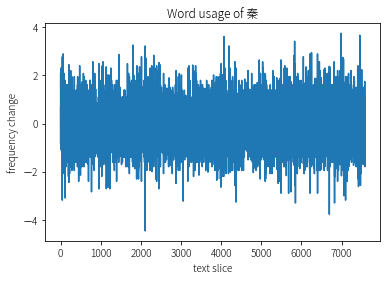

In [6]:
growth_obj.plot_char_freq_by_text_slice('秦')

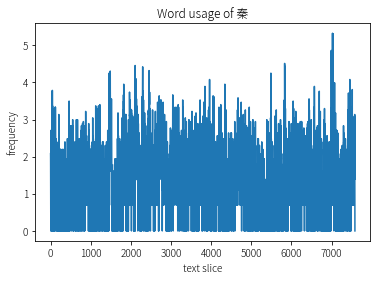

In [7]:
growth_obj.plot_char_freq_by_text_slice('秦', show_change=False)

In [8]:
expected_V = growth_obj.get_expected_V
expected_V[:10]

[2247.1573191338703,
 2859.0473295232987,
 3209.767323682747,
 3453.0483870512617,
 3639.1292944272245,
 3790.2294627679075,
 3917.9299935134404,
 4028.9523126952026,
 4127.511376522776,
 4216.4102418563725]

In [9]:
chunked_V = growth_obj.get_chunked_V
chunked_V[:10]

[1747, 2279, 2505, 2734, 2881, 2986, 3071, 3150, 3218, 3271]

In [10]:
# xs, ys, Vset = growth_obj.calc_chunked_V(diachronic_texts_shuffled)
# ys[:10]

In [11]:
# growth_obj.get_vgc()
# growth_obj.vgc_df['random_chunked_V'] = ys
# growth_obj.vgc_df['random_V_diff'] = growth_obj.vgc_df['expected_V'] - growth_obj.vgc_df['random_chunked_V']
# growth_obj.get_vgc()

In [12]:
# diachronic_texts_shuffled2 = list(growth_obj.text)
# random.shuffle(diachronic_texts_shuffled2)
# diachronic_texts_shuffled2 = ''.join(diachronic_texts_shuffled2)

# _, ys_2, _ = growth_obj.calc_chunked_V(diachronic_texts_shuffled2)
# ys_2[:10]

In [13]:
# growth_obj.vgc_df['random2_chunked_V'] = ys_2
# growth_obj.vgc_df['random2_V_diff'] = growth_obj.vgc_df['expected_V'] - growth_obj.vgc_df['random2_chunked_V']
# growth_obj.get_vgc()

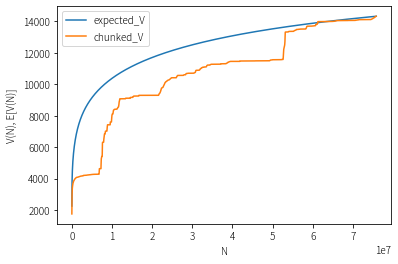

In [14]:
growth_obj.plot_vgc_curve(growth_obj.get_vgc())

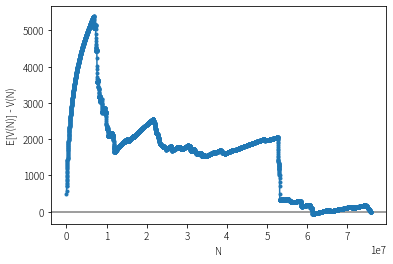

In [15]:
# vgc_df = growth_obj.vgc_df
growth_obj.plot_vgc_residuals(growth_obj.get_vgc())

# plt.plot(vgc_df['N'], vgc_df['random_V_diff'], linestyle='dotted', marker='o', markersize=2.5)
# plt.plot(vgc_df['N'], vgc_df['random2_V_diff'], linestyle='dotted', marker='o', markersize=2.5)

In [16]:
min_val, prog_err_scores_df = growth_obj.get_prog_err_scores_df()
prog_err_scores_df

,N,expected_V,chunked_V,V_diff,chunked_V_prev,expected_V_prev,prog_err_score,prog_err_score_log
0,0,2247.157319,1747,500.157319,0,0.000000,500.157319,6.602301
1,10000,2859.047330,2279,580.047330,1747,2247.157319,79.890010,5.757391
2,20000,3209.767324,2505,704.767324,2279,2859.047330,124.719994,5.889851
3,30000,3453.048387,2734,719.048387,2505,3209.767324,14.281063,5.525104
4,40000,3639.129294,2881,758.129294,2734,3453.048387,39.080907,5.619358
...,...,...,...,...,...,...,...,...
7578,75780000,14327.123493,14325,2.123493,14323,14326.878163,-1.754670,5.459061
7579,75790000,14327.368783,14326,1.368783,14325,14327.123493,-0.754710,5.463309
7580,75800000,14327.614033,14327,0.614033,14326,14327.368783,-0.754750,5.463309
7581,75810000,14327.859243,14327,0.859243,14327,14327.614033,0.245210,5.467540


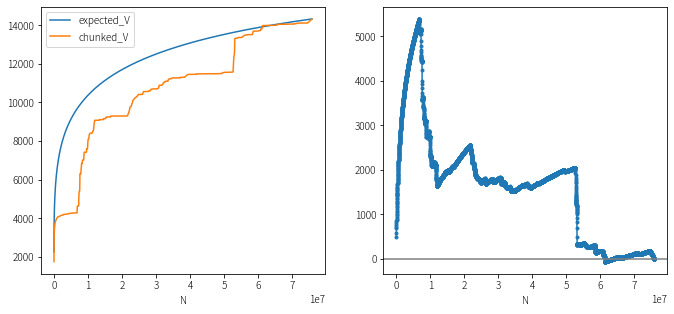

In [17]:
growth_obj.plot_vgc(growth_obj.get_vgc())

In [18]:
growth_obj.get_prog_err_scores_df()[1]

,N,expected_V,chunked_V,V_diff,chunked_V_prev,expected_V_prev,prog_err_score,prog_err_score_log
0,0,2247.157319,1747,500.157319,0,0.000000,500.157319,6.602301
1,10000,2859.047330,2279,580.047330,1747,2247.157319,79.890010,5.757391
2,20000,3209.767324,2505,704.767324,2279,2859.047330,124.719994,5.889851
3,30000,3453.048387,2734,719.048387,2505,3209.767324,14.281063,5.525104
4,40000,3639.129294,2881,758.129294,2734,3453.048387,39.080907,5.619358
...,...,...,...,...,...,...,...,...
7578,75780000,14327.123493,14325,2.123493,14323,14326.878163,-1.754670,5.459061
7579,75790000,14327.368783,14326,1.368783,14325,14327.123493,-0.754710,5.463309
7580,75800000,14327.614033,14327,0.614033,14326,14327.368783,-0.754750,5.463309
7581,75810000,14327.859243,14327,0.859243,14327,14327.614033,0.245210,5.467540


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: unknown
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  font

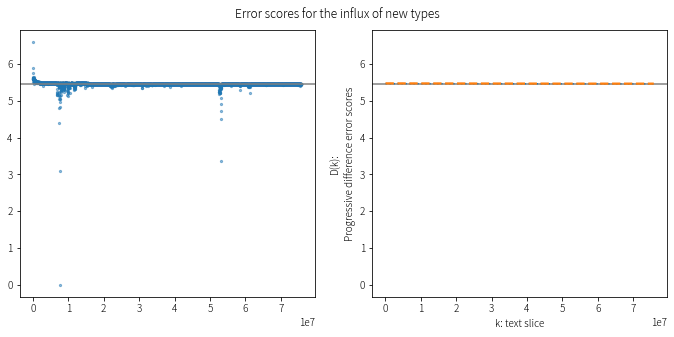

In [19]:
growth_obj.plot_prog_err_scores(*growth_obj.get_prog_err_scores_df())

In [20]:
print('Underdispersed:', len(growth_obj.get_underdisperse_chars), growth_obj.get_underdisperse_chars)
print('Overdispersed:', len(growth_obj.get_overdisperse_chars), growth_obj.get_overdisperse_chars)

7583it [00:14, 515.57it/s]


Underdispersed: 743 ['韓', '一', '豐', '口', '鄭', '取', '司', '計', '八', '不', '夏', '夕', '書', '也', '四', '五', '教', '化', '則', '呂', '莊', '蓋', '下', '二', '賈', '馬', '因', '以', '山', '東', '用', '建', '實', '高', '陽', '許', '子', '長', '善', '事', '古', '稱', '良', '史', '然', '其', '疏', '是', '非', '於', '聖', '人', '言', '論', '數', '為', '所', '而', '作', '思', '好', '今', '正', '傳', '遺', '文', '始', '自', '吳', '起', '漢', '興', '平', '元', '年', '終', '陳', '末', '明', '三', '黃', '龍', '已', '前', '雖', '引', '十', '餘', '之', '首', '及', '晉', '太', '後', '載', '復', '西', '遷', '即', '位', '帝', '百', '至', '禪', '宋', '六', '齊', '七', '梁', '入', '止', '開', '皇', '號', '樂', '季', '初', '家', '共', '九', '南', '朝', '代', '上', '通', '并', '總', '間', '著', '成', '卷', '名', '曰', '具', '君', '臣', '行', '有', '詳', '簡', '要', '必', '備', '舉', '若', '土', '地', '川', '城', '池', '宮', '當', '時', '制', '置', '或', '典', '各', '處', '存', '異', '辭', '本', '相', '屬', '皆', '注', '記', '益', '見', '知', '使', '周', '寶', '無', '失', '者', '大', '在', '武', '昌', '都', '江', '陵', '第', '楚', '金', '邑', '秦', '改', '業', '故', '祖', '禮', '牛', '女',

In [21]:
growth_obj.get_VU[:5]

array([494, 463, 467, 488, 488])

In [22]:
growth_obj.get_NU[:5]

array([2925, 2774, 2619, 2837, 2871])

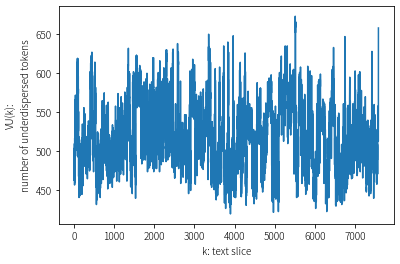

In [23]:
growth_obj.plot_VU()

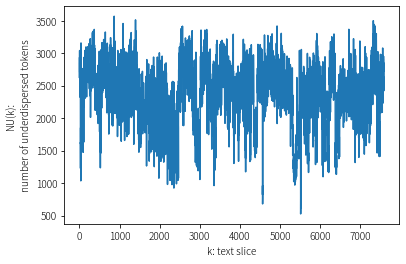

In [24]:
growth_obj.plot_NU()

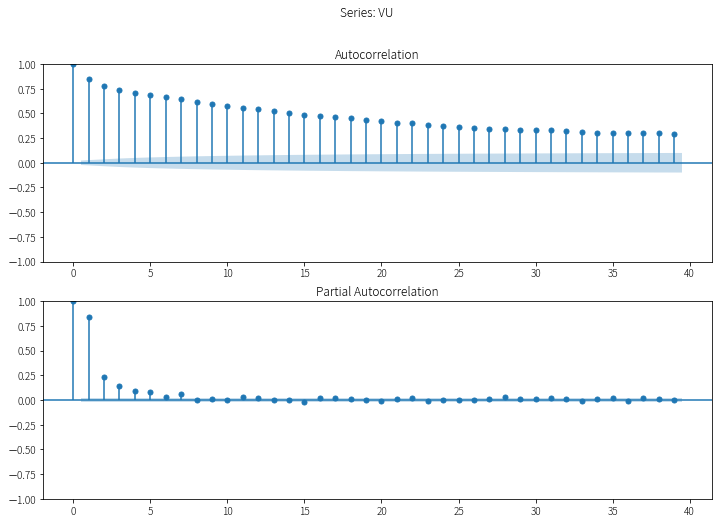

In [25]:
growth_obj.plot_VU_acf()

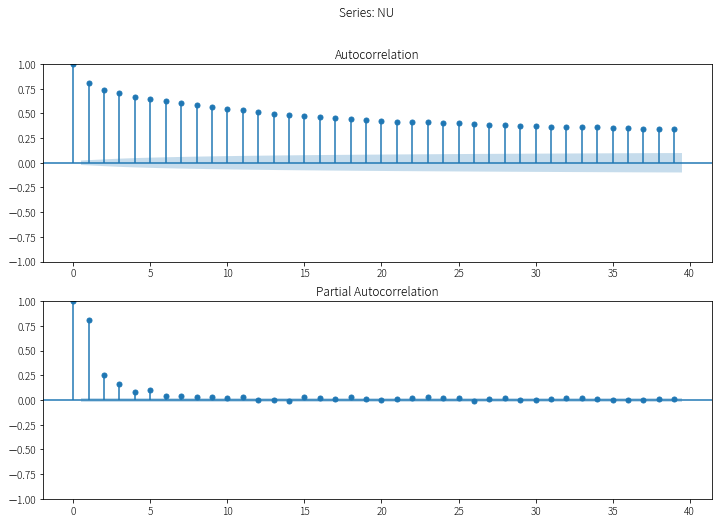

In [26]:
growth_obj.plot_NU_acf()

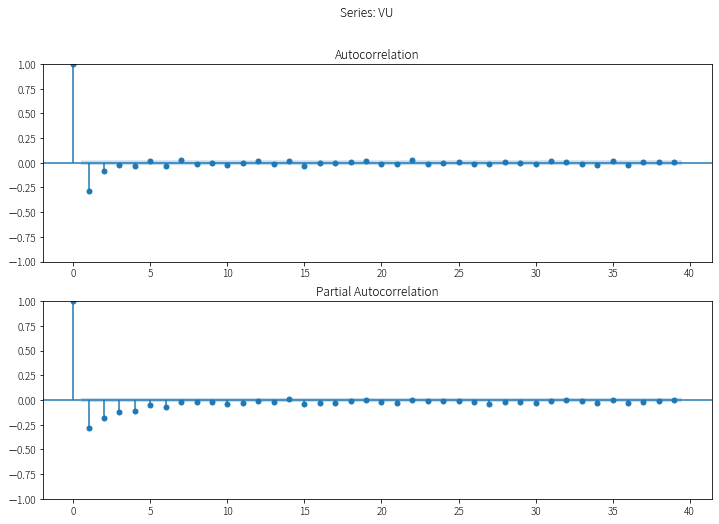

In [27]:
growth_obj.plot_VU_acf(diff=1)

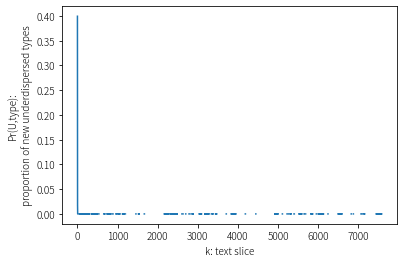

In [28]:
growth_obj.plot_Pr_type()

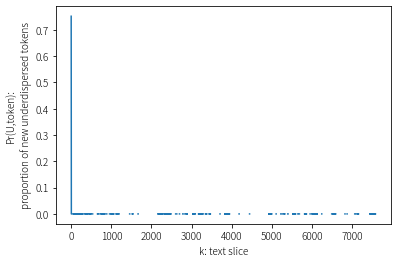

In [29]:
growth_obj.plot_Pr_token()